Analyze a covert social network to determine who the weakest link is, and what happens to the network when you remove that link. Provide notes and a write-up, which should include at least some level of visualization.

In [495]:
# import relevant packages
import pandas as pd
import numpy as np
import networkx as nx
from csv import reader
from operator import itemgetter

In [496]:
# import data
data = pd.read_csv('Desktop/caviar/CAVIAR3.csv')
data

,Unnamed: 0,1,4,89,83,3,5,48,88,85,...,32,84,49,107,50,99,13,51,12,52
0,1,0,0,7,38,29,7,2,0,11,...,1,4,3,0,3,0,2,0,2,1
1,4,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,89,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,83,4,0,0,0,0,0,0,0,0,...,0,3,0,3,0,0,0,0,0,2
4,3,1,0,0,0,0,0,0,0,4,...,0,0,0,0,0,1,0,0,2,0
5,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,48,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,88,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
8,85,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,90,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [497]:
# change index, using values from csv
data.index = [1,4,89,83,3,5,48,88,85,90,86,2,7,6,8,55,10,56,76,9,34,35,11,32,84,49,107,50,99,13,51,12,52]

In [498]:
# remove old index column
data1 = data.iloc[:,1:]

In [499]:
# change dataframe to array
data2 = np.array(data1)

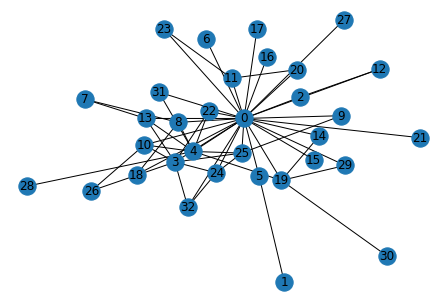

In [500]:
# turn array into adjacency matrix
G = nx.from_numpy_matrix(data2)

# draw graph exploring the relationships
nx.draw(G, with_labels=True)

In [501]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 33
Number of edges: 56
Average degree:   3.3939


In [502]:
density = nx.density(G)
density

0.10606060606060606

We see our density is .106 on a scale of 0-1, which means it is not very dense. 

In [503]:
# create degree dictionary which consists of nodes and their degrees
degree_dict = dict(G.degree(G.nodes()))

# find the strength 
nx.set_node_attributes(G, degree_dict, 'degree')

# sort from highest to lowest
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

# subset for first 5 values
sorted_degree[:5]

[(0, 27), (4, 9), (3, 8), (19, 5), (25, 5)]

https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python#what-might-you-learn-from-network-data

In [504]:
print("Bottom 5 nodes by degree:")
for d in sorted_degree[-5:]:
    print(d)

Bottom 5 nodes by degree:
(17, 1)
(21, 1)
(27, 1)
(28, 1)
(30, 1)


In [505]:
# use minimum function to identify the node with the weakest strength
weakest_node = min(degree_dict, key=degree_dict.get)
weakest_node

1

Based on this it is clear that 1 is our weakest node, so let's remove it! Before we do that let's do some more exploratory analysis. 

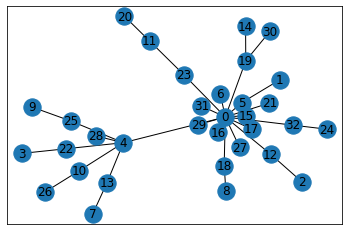

In [506]:
# explore minimum_spanning_tree function
T = nx.minimum_spanning_tree(G)

# draw
nx.draw_networkx(T)

In [511]:
# explore closeness centrality, sort from lowest to highest 
closeness = nx.closeness_centrality(G)
print(sorted(closeness.items(), key=lambda x: x[1], reverse=False)[0:10])

[(30, 0.34831460674157305), (7, 0.36046511627906974), (26, 0.37349397590361444), (28, 0.37349397590361444), (5, 0.47692307692307695), (6, 0.47692307692307695), (15, 0.47692307692307695), (16, 0.47692307692307695), (17, 0.47692307692307695), (21, 0.47692307692307695)]


In [512]:
# explore closeness centrality, sort from lowest to highest
betweenness = nx.betweenness_centrality(G)
print(sorted(betweenness.items(), key=lambda x: x[1], reverse=False)[0:10])

[(2, 0.0), (5, 0.0), (6, 0.0), (9, 0.0), (12, 0.0), (14, 0.0), (15, 0.0), (16, 0.0), (17, 0.0), (18, 0.0)]


In [513]:
# explore closeness centrality, sort from lowest to highest
centrality = nx.degree_centrality(G)
print(sorted(centrality.items(), key=lambda x: x[1], reverse=False)[0:10])

[(5, 0.03225806451612903), (6, 0.03225806451612903), (15, 0.03225806451612903), (16, 0.03225806451612903), (17, 0.03225806451612903), (21, 0.03225806451612903), (27, 0.03225806451612903), (28, 0.03225806451612903), (30, 0.03225806451612903), (2, 0.06451612903225806)]


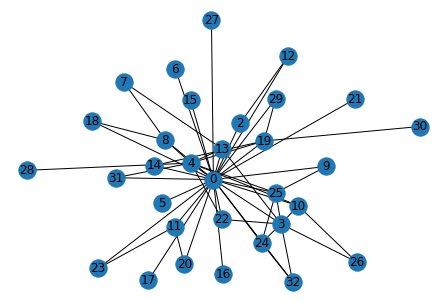

In [510]:
# Remove the edge with the smallest weight from the graph
G.remove_node(1)

# Draw the graph
nx.draw(G, with_labels=True)

Overall, this activity was very interesting because it is an undirected graph it is impossible to definitevely identify the weakest link or node. Thus, to answer this question I explored numerous methodologies. The first was to define weakest node as the node with the smallest sum of edges. In other words, the node with the smallest number of edges. When I did this, I saw that 1 appeared to have the least amount of edges, thus I considered it in the running for weakest node. Other methodologies to answering this question could include looking at measures such as degree centrality and betweeness centrality which gives us an idea of which nodes are potentially most involved in the graph. It makes sense that when we removed node #1 from the visualization it was difficult to notice a drastic change.  